<a href="https://colab.research.google.com/github/marvande/master-thesis/blob/main/Copy_of_pytorch_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code in pytorch:

In [1]:
! pip install cartopy
! pip install pyproj

! pip uninstall shapely
! pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.1.post1
Uninstalling Shapely-1.8.1.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.1.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos-5781ad74.so.3.10.2
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-fdac42b1.so.1.16.0
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.1.post1
     |████████████████████████████████| 198 kB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.1.post1-cp37-cp37m-linux_x86_64.whl size=665627 sha256=6468d64872ecc9a5ffe0cc040643d8d3c17ef47cbd95e3152e069dc7f6a7fe08
  Stored in directory: /root/.cache/pip/wheels/ea/8d/2f/ab748b8a432b3c6cd72e751b3bca17c5a9ed4538b1e78467e6
Successfully built shapely
ERROR: pip's dependency resolver does not currently ta

In [2]:
# Basics
from matplotlib import pyplot as plt
import matplotlib.path as mpath
import os
import sys
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
from re import search
from math import cos,sin,pi
import random as rn

# xarray and cartopy plots
import xarray as xr
#import cf_units

import cartopy
import cartopy.crs as ccrs
import pyproj
from pyproj import Transformer
#import rasterio

# Google file system
#import gcsfs
#from google.cloud import storage

# ML
from scipy import ndimage
import torch
import tensorflow as tf 

"""
import keras
import tensorflow as tf 
from keras import backend as K

from tensorflow.python.keras.backend import set_session

from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Conv2DTranspose, Reshape, concatenate, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from netCDF4 import Dataset"""
#from netCDF4 import Dataset
#import h5netcdf
#import netCDF4

from sklearn.model_selection import train_test_split
#import setGPU

# Import custom scripts
sys.path.append('../')
#from process_pangeo import *
from GC_scripts import *
#from processRCM import *
#from reprojectionFunctions import *
#from MakeInputFunctions import *
#from model import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")
        
print(f"Name of current CUDA device:{torch.cuda.get_device_name(cuda_id)}")

Is CUDA supported by this system? True
CUDA version: 11.3
ID of current CUDA device:0
Name of current CUDA device:Tesla P100-PCIE-16GB


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
# Load configuration file:
from config import *
from helperFunctions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from google.colab import auth
auth.authenticate_user()
# Give our project ID
project_id = 'ee-iceshelf-gee4geo'
!gcloud config set project {project_id}
# Download the file from a given Google Cloud Storage bucket.
!gsutil cp gs://ee-downscalingclimatemodels/test.txt /tmp/gsutil_download.txt
# Print the result to make sure the transfer worked.
!cat /tmp/gsutil_download.txt

Updated property [core/project].
Copying gs://ee-downscalingclimatemodels/test.txt...
/ [1 files][   13.0 B/   13.0 B]                                                
Operation completed over 1 objects/13.0 B.                                       
AIAIAIAIAIAIA

## Load data:

In [7]:
if downloadFromGC:
    downloadFileFromGC(pathGC, '', fileGCMLike)
    GCMLike = xr.open_dataset(fileGCMLike)
    os.remove(fileGCMLike)
else:
    GCMLike = xr.open_dataset(pathCluster+fileGCMLike)
print(GCMLike.dims)
GCMLike

Frozen(SortedKeysDict({'x': 90, 'y': 25, 'time': 1452}))


<xarray.Dataset>
Dimensions:      (time: 1452, x: 90, y: 25)
Coordinates:
    spatial_ref  int64 ...
  * x            (x) float32 -2.992e+06 -2.924e+06 ... 2.992e+06 3.06e+06
  * y            (y) float32 -2.472e+06 -2.266e+06 ... 2.266e+06 2.472e+06
  * time         (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2100-12-31
Data variables:
    RF           (time, y, x) float32 ...
    SP           (time, y, x) float32 ...
    LWD          (time, y, x) float32 ...
    SWD          (time, y, x) float32 ...
    TT           (time, y, x) float32 ...
    SMB          (time, y, x) float32 ...
    VVP          (time, y, x) float64 ...
    UUP          (time, y, x) float64 ...
Attributes:
    crs:      3031

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:561: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for inter in intersection:
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be rem

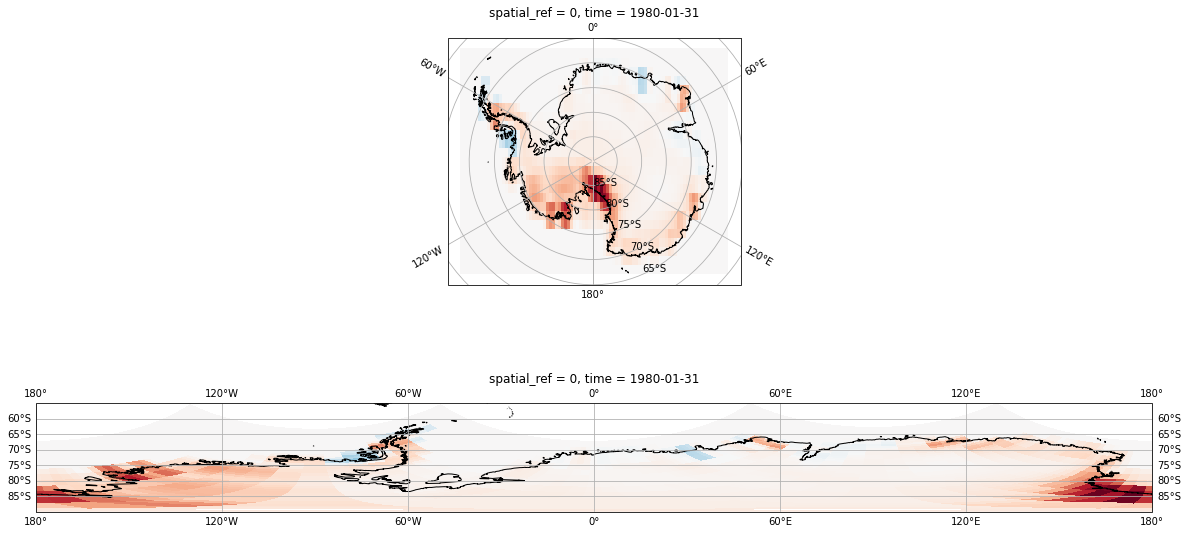

In [8]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(2, 1, 1, projection=ccrs.SouthPolarStereo())
GCMLike.SMB.isel(time=0).plot(
    x="x", ax=ax, transform=ccrs.SouthPolarStereo(), add_colorbar=False
)

ax.coastlines("10m", color="black")
ax.gridlines(draw_labels=True)


ax = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
GCMLike.SMB.isel(time=0).plot(
    x="x", ax=ax, transform=ccrs.SouthPolarStereo(), add_colorbar=False
)
ax.coastlines("10m", color="black")
ax.gridlines(draw_labels=True)

In [9]:
if downloadFromGC:
    downloadFileFromGC(pathGC, '', fileTarget)
    target_dataset = xr.open_dataset(fileTarget)
    os.remove(fileTarget)
else:
    target_dataset = xr.open_dataset(pathCluster+fileTarget)
print(target_dataset.dims)

# Cut a small part of on the right that is not too important
N = 160
max_x = (N / 2) * 35 * 1000
max_y = (N / 2) * 35 * 1000

target_dataset = cutBoundaries(target_dataset, max_x, max_y)
print("New target dimensions:", target_dataset.dims)

Frozen(SortedKeysDict({'time': 1452, 'y': 148, 'x': 176, 'PLEV': 7}))
New target dimensions: Frozen(SortedKeysDict({'time': 1452, 'y': 148, 'x': 160, 'PLEV': 7}))


## Create input and target:

**Z**:
- (ignore for now) External forcing also given to RCM → total concentration of greenhouse gases and solar and ozone forcings
- Cosinus, sinus vector to encode information about day of year
- Daily spatial means and standard deviations time series for each $X_{i,j,m}$ (because normalising 2D variables removes temporal information)

**X**: 
SHAPE `[nbmonths, x, y, nb_vars]`

For pytorch need to put into `[nbmonths, nb_vars, x, y]`

In [10]:
def input_maker(
    GCMLike,
    size_input_domain=16,  # size of domain, format: 8,16,32, must be defined in advance
    stand=True,  # standardization
    seas=True,  # put a cos, sin vector to control the season, format : bool
    means=True,  # add the mean of the variables raw or stdz, format : bool
    stds=True,  # add the std of the variables raw or stdz, format : bool
    resize_input=True,  # resize input to size_input_domain
    region="Larsen",  # region of interest
    print_=True
):

    if region != "whole antarctica":
        DATASET = createLowerInput(GCMLike, region = region, Nx=48, Ny=25, print_=False)
    else:
        DATASET = GCMLike
    """
    MAKE THE 2D INPUT ARRAY
    SHAPE [nbmonths, x, y, nb_vars]
    """

    # Remove target variable from DATASET:
    DATASET = DATASET.drop(["SMB"])

    nbmonths = DATASET.dims["time"]
    x = DATASET.dims["x"]
    y = DATASET.dims["y"]
    nb_vars = len(list(DATASET.data_vars))
    VAR_LIST = list(DATASET.data_vars)

    INPUT_2D_bf = np.transpose(
        np.asarray([DATASET[i].values for i in VAR_LIST]), [1, 2, 3, 0]
    )

    # if no size is given, take smallest power of 2
    if size_input_domain == None:
        size_input_domain = np.max(
            [
                highestPowerof2(INPUT_2D_bf.shape[1]),
                highestPowerof2(INPUT_2D_bf.shape[2]),
            ]
        )

    if resize_input:
        # resize to size_input_domain
        INPUT_2D = resize(INPUT_2D_bf, size_input_domain, size_input_domain, print_)
    else:
        INPUT_2D = INPUT_2D_bf

    if stand:
        # Standardize:
        INPUT_2D_SDTZ = standardize(INPUT_2D)
        # in their code with aerosols extra stuff but ignore
        INPUT_2D_ARRAY = INPUT_2D_SDTZ
    else:
        INPUT_2D_ARRAY = INPUT_2D

    if print_:
        print("Parameters:\n -------------------")
        print("Size of input domain:", size_input_domain)
        print("Region:", region)
        print("\nCreating 2D input X:\n -------------------")
        print(f"Number of variables: {nb_vars}")
        print(f"Variables: {VAR_LIST}")
        print(f"INPUT_2D shape: {INPUT_2D_ARRAY.shape}")
        print("\nCreating 1D input Z:\n -------------------")
        
    """
    MAKE THE 1D INPUT ARRAY
    CONTAINS MEANS, STD SEASON IF ASKED
    """
    
    INPUT_1D = []
    if means and stds:
        vect_std = INPUT_2D.std(axis=(1, 2))
        vect_means = INPUT_2D.mean(axis=(1, 2))
        SpatialMean = vect_means.reshape(INPUT_2D.shape[0], 1, 1, INPUT_2D.shape[3])
        SpatialSTD = vect_std.reshape(INPUT_2D.shape[0], 1, 1, INPUT_2D.shape[3])

        INPUT_1D.append(SpatialMean)
        INPUT_1D.append(SpatialSTD)
        if print_:
            print(f"SpatialMean/std shape: {SpatialMean.shape}")

    if seas:
        months = 12
        cosvect = np.tile(
            [cos(2 * i * pi / months) for i in range(months)],
            int(INPUT_2D.shape[0] / months),
        )
        sinvect = np.tile(
            [sin(2 * i * pi / months) for i in range(months)],
            int(INPUT_2D.shape[0] / months),
        )
        cosvect = cosvect.reshape(INPUT_2D.shape[0], 1, 1, 1)
        sinvect = sinvect.reshape(INPUT_2D.shape[0], 1, 1, 1)

        INPUT_1D.append(cosvect)
        INPUT_1D.append(sinvect)
        if print_:
            print(f"Cos/sin encoding shape: {cosvect.shape}")

    INPUT_1D_ARRAY = np.concatenate(INPUT_1D, axis=3)
    if print_:
        print(f"INPUT_1D shape: {INPUT_1D_ARRAY.shape}")
        
    DATASET.close()
    return INPUT_2D_ARRAY, INPUT_1D_ARRAY, VAR_LIST

In [17]:
# Download GMC like RCM input data:
fileGCMLike = "MAR(ACCESS1-3)-stereographic_monthly_GCM_like.nc"
if downloadFromGC:
    downloadFileFromGC(pathGC, "", fileGCMLike)
    GCMLike = xr.open_dataset(fileGCMLike)
    os.remove(fileGCMLike)
else:
    GCMLike = xr.open_dataset(pathCluster+fileGCMLike)

region = "Larsen"
size_input_domain = 32

# Make input
i2D, i1D, VAR_LIST = input_maker(
    GCMLike,
    size_input_domain,
    stand=True,  # standardization
    seas=True,  # put a cos,sin vector to control the season, format : bool
    means=True,  # add the mean of the variables raw or stdz, format : r,s,n
    stds=True,
    resize_input=True,
    region=region,
)

inputs_2D = []
inputs_1D = []
inputs_1D.append(i1D)
inputs_2D.append(i2D)

# Make a non standardised version for plots:
i2D_ns, i1D_ns, var_list = input_maker(
    GCMLike,
    size_input_domain,
    stand=False,  # standardization
    seas=True,  # put a cos,sin vector to control the season, format : bool
    means=True,  # add the mean of the variables raw or stdz, format : r,s,n
    stds=True,
    resize_input=False,
    region=region,
    print_=False,
)

inputs_2D_ns = []
inputs_1D_ns = []
inputs_1D_ns.append(i1D_ns)
inputs_2D_ns.append(i2D_ns)

Shape before resizing: (1452, 25, 48, 7)
Shape after resizing: (1452, 32, 32, 7)
Parameters:
 -------------------
Size of input domain: 32
Region: Larsen

Creating 2D input X:
 -------------------
Number of variables: 7
Variables: ['RF', 'SP', 'LWD', 'SWD', 'TT', 'VVP', 'UUP']
INPUT_2D shape: (1452, 32, 32, 7)

Creating 1D input Z:
 -------------------
SpatialMean/std shape: (1452, 1, 1, 7)
Cos/sin encoding shape: (1452, 1, 1, 1)
INPUT_1D shape: (1452, 1, 1, 16)


In [18]:
def target_maker(
    target_dataset, 
    region="Larsen", # region of interest
    resize=True, # resize to target_size
    target_size=None # if none provided and resize true, set to min highest power of 2
):
    target_times = []
    targets = []

    if region != "Whole antarctica":
        lowerTarget = createLowerTarget(target_dataset, region = region, Nx=64, Ny=64, print_=False)
        targetArray = lowerTarget.SMB.values
    else:
        targetArray = target_dataset.SMB.values

    targetArray = targetArray.reshape(
        targetArray.shape[0], targetArray.shape[1], targetArray.shape[2], 1
    )

    if target_size == None:
        # resize to highest power of 2:
        target_size = np.min(
            [
                highestPowerof2(targetArray.shape[1]),
                highestPowerof2(targetArray.shape[2]),
            ]
        )

    if resize:
        target_SMB = resize(targetArray, target_size, target_size)
    else:
        target_SMB = targetArray

    targets.append(target_SMB)
    target_times.append(target_dataset.time.values)

    full_target = np.concatenate(targets, axis=0)

    return full_target, target_times

In [19]:
full_target, target_times = target_maker(
    target_dataset, region="Larsen", resize=False
)
# Full target to model
target_time = np.concatenate(target_times, axis=0)
target_lon = target_dataset["x"]
target_lat = target_dataset["y"]

In [20]:
# Full input to model
full_input=[np.concatenate(inputs_2D,axis=0),np.concatenate(inputs_1D,axis=0)]
full_input_ns=[np.concatenate(inputs_2D_ns,axis=0),np.concatenate(inputs_1D_ns,axis=0)]

print("Shapes of targets and inputs:\n---------------------------")
print("Target:", full_target.shape)
print("Input 2D:", full_input[0].shape)
print("Input 1D:", full_input[1].shape)

Shapes of targets and inputs:
---------------------------
Target: (1452, 64, 64, 1)
Input 2D: (1452, 32, 32, 7)
Input 1D: (1452, 1, 1, 16)


### Change to tensors:

In [21]:
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, random_split

In [22]:
X = torch.tensor(full_input[0].transpose(0, 3,1,2))
Z = torch.tensor(full_input[1].transpose(0, 3,1,2))
Y = torch.tensor(full_target.transpose(0, 3,1,2))
X.shape, Z.shape, Y.shape

(torch.Size([1452, 7, 32, 32]),
 torch.Size([1452, 16, 1, 1]),
 torch.Size([1452, 1, 64, 64]))

## Create dataset:

In [55]:
seed = 123
dataset = TensorDataset(X, Z, Y)
batch_size=32
loader = DataLoader(
    dataset,    
)

# Example:
(x, z, y) = next(iter(loader))
print(x.shape, z.shape, y.shape)

torch.Size([1, 7, 32, 32]) torch.Size([1, 16, 1, 1]) torch.Size([1, 1, 64, 64])


###  Split into train / validation partitions

In [ ]:
# 2. Split into train / validation partitions
val_percent = 0.2
n_val = int(len(dataset) * val_percent)
n_train = len(dataset) - n_val
train_set, val_set = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(seed))

### Create data loaders

In [53]:
# 3. Create data loaders
batch_size = 32
loader_args = dict(batch_size=batch_size)
train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_set, shuffle=False, batch_size=batch_size)

2D Feature batch shape: torch.Size([32, 7, 32, 32])
1D Feature batch shape: torch.Size([32, 16, 1, 1])
Labels batch shape: torch.Size([32, 1, 64, 64])


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

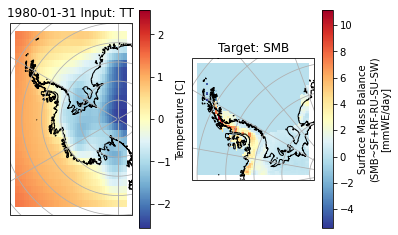

In [54]:
# Display image and label.
train_X, train_Z, train_Y = next(iter(train_loader))
print(f"2D Feature batch shape: {train_X.size()}")
print(f"1D Feature batch shape: {train_Z.size()}")
print(f"Labels batch shape: {train_Y.size()}")

sample2dtrain_ = train_X.numpy().transpose(0,2,3,1)[0]
sampletarget_ = train_Y.numpy().transpose(0,2,3,1)[0]
randTime = 0
dt = pd.to_datetime([GCMLike.time.isel(time=randTime).values])
time = str(dt.date[0])

if REGION == "Larsen":
  sample2dtrain_ = resize(sample2dtrain_, 25, 48, print_=False)
else:
  sample2dtrain_ = resize(sample2dtrain_, 25, 90, print_=False)
vmin = np.min(sampletarget_)
vmax = np.max(sampletarget_)

ax = plt.subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
plotTrain(GCMLike, sample2dtrain_, 4, ax, time, VAR_LIST, region='Larsen')
ax = plt.subplot(1, 2, 2, projection=ccrs.SouthPolarStereo())
plotTarget(target_dataset, sampletarget_, ax, vmin, vmax, region='Larsen')

## U-Net:

In [60]:
import torch.nn as nn
import torch.nn.functional as F

In [196]:
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with double conv then maxpool"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
        self.maxpool = nn.MaxPool2d(2)
        self.doubleconv = DoubleConv(in_channels, out_channels)

    def forward(self, x):
        x1 = self.doubleconv(x)
        x2 = self.maxpool(x1)
        return x2, x1


class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=3, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class UpLastLayer(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, stride = 2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x):
        print(x.shape)
        x1 = self.up(x)
        print(x1.shape)
        x2 = self.conv(x1)
        print(x2.shape)
        return x2


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class InitialConv(nn.Module):
    def __init__(self, in_channels, out_channels, sizex, size):
        super(InitialConv, self).__init__()
        self.diff = sizex-size+1
        self.firstconv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=self.diff), 
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        x1 = self.firstconv(x)
        return x1

class LinearUpsamplingZ(nn.Module):
  def __init__(self, in_channels=16, out_channels=1024):
    super(LinearUpsamplingZ, self).__init__()
    self.l1 = nn.Linear(16, 128)
    self.l2 = nn.Linear(128, 256)
    self.l3 = nn.Linear(256, 512)
    self.l4 = nn.Linear(512, 1024)
  def forward(self, z):
    # transform to remove last dimensions
    z1 = z.view(z.shape[0], -1) # (batch, 16)
    z2 = self.l1(z1.float())    # (batch, 128)
    z3 = self.l2(z2)            # (batch, 256)
    z4 = self.l3(z3)            # (batch, 512)
    z5 = self.l4(z4)            # (batch, 1024)
    
    # transform back to original shape
    z6 = z5.view(z5.shape[0], 1,1, -1).transpose(3,1) # (batch, 1024, 1, 1)
    return z6


In [197]:
class UNetMarijn(nn.Module):
  def __init__(self, n_channels_x=7, n_channels_y=16, size=32, filter=64, bilinear=False):
    super(UNetMarijn, self).__init__()
    self.n_channels_x = n_channels_x
    self.n_channels_y = n_channels_y
    self.size = size
    self.filter = filter
    self.bilinear = bilinear

    # input  (batch, 7, 32, 32)
    # first conv:
    self.initialconv = InitialConv(n_channels_x, 32, 32, self.size) 
    
    # downsampling:
    self.d1 = Down(32, 64)
    self.d2 = Down(64, 128)
    self.d3 = Down(128, 256)
    self.d4 = Down(256, 512)
    self.d5 = Down(512, 1024)

    # last conv of downsampling
    self.last_conv_down = DoubleConv(1024, 1024)

    # linewar downsampling of z:
    self.linz = LinearUpsamplingZ(n_channels_y, 1024)

    # upsampling:
    self.up1 = Up(2048, 1024, bilinear)
    self.up2 = Up(1024, 512, bilinear)
    self.up3 = Up(512, 256, bilinear)
    self.up4 = Up(256, 128, bilinear)
    self.up5 = Up(128, 64, bilinear)
    self.up6 = UpLastLayer(64, 64, bilinear)

  def forward(self, x,z):
    x1 = self.initialconv(x) # (batch, 32, 32, 32)

    # Downsampling 
    x2, x2_bm = self.d1(x1)  # (batch, 64, 16, 16)
    x3, x3_bm = self.d2(x2)  # (batch, 128, 8, 8)
    x4, x4_bm = self.d3(x3)  # (batch, 256, 4, 4)
    x5, x5_bm = self.d4(x4)  # (batch, 512, 2, 2)
    x6, x6_bm = self.d5(x5)  # (batch, 1024, 1, 1)
    x7 = self.last_conv_down(x6) # (batch, 1024, 1, 1)

    # Upsample second input to have same shape as last_conv [1024, 1, 1]
    z1 = self.linz(z)

    # concatenate both:
    x8 = torch.cat([x7, z1], dim = 1) # (batch, 2048, 1, 1)

    # Upsampling
    x = self.up1(x8, x6_bm) # (batch, 1024, 2, 2)
    x = self.up2(x, x5_bm)  # (batch, 512, 4, 4)
    x = self.up3(x, x4_bm)  # (batch, 256, 8, 8)
    x = self.up4(x, x3_bm)  # (batch, 128, 16, 16)
    x = self.up5(x, x2_bm)  # (batch, 64, 32, 32)
    print(x.shape)
    x = self.up6(x)

    # Last layer:
    return x

In [198]:
n_channels = 7
unet = UNetMarijn(n_channels_x=7, n_channels_y=16, size=32, filter=64, bilinear=False)

train_X, train_Z, train_Y = next(iter(train_loader))
x = unet(train_X, train_Z)
x.shape

torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 65, 65])
torch.Size([32, 64, 65, 65])


torch.Size([32, 64, 65, 65])

In [ ]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits